We need to match the Glasser labels from the `neuroparc` package to the ones in the F-TRACT. As the atlases presented in `neuroparc` miss provenance information, we match also the ROIs also spatially. 

In [22]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns
import nibabel as nb
from nilearn import plotting

from matplotlib import rcParams
rcParams['figure.figsize'] = 15,6

from src import data
!date -I

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2024-05-13


## Load the tables

In [23]:
df_dice = pd.read_csv( 
    data.path('external/glasser_parcellation_mapping/DICE_Glasser_Yeo17_res-1x1x1.csv'), # Glasser labels same for Yeo and Schaefer 
    index_col=0
)

df_dice_schaefer = pd.read_csv( 
    data.path('external/glasser_parcellation_mapping/DICE_Glasser_Schaefer200_res-1x1x1.csv'), # Glasser labels same for Yeo and Schaefer 
    index_col=0
)

df_dice

,1_Visual_A,2_Visual_B,3_Somatomotor_A,4_Somatomotor_B,5_Temporal_Parietal,6_Frontoparietal_Area,7_Dorsal_Attention_B,8_Salience+Ventral_Attention_A,9_Salience+Ventral_Attention_B,10_Control_A,11_Control_B,12_Control_C,13_Default_A,14_Default_B,15_Default_C,16_Limbic_A,17_Limbic_B
glasser_roi,,,,,,,,,,,,,,,,,
Primary_visual_cortex,0.064615,0.204249,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Medial_superior_temporal_area,0.005024,0.000000,0.0,0.0,0.019105,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Sixth_Visual_Area,0.000000,0.065254,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000143,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Second_Visual_Area,0.080482,0.130189,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000189,0.0,0.000000,0.000000,0.000889,0.000028,0.000000
Third_Visual_Area,0.087555,0.055593,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Area_STSv_Anterior,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000740,0.006917,0.000000,0.008169,0.024619
Area_TE1_Middle,0.000000,0.000000,0.0,0.0,0.001455,0.0,0.000000,0.000000,0.002287,0.0,0.000000,0.0,0.070971,0.000000,0.000000,0.000072,0.020839
Para-Insular_Area,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.013649,0.000000,0.001013,0.0,0.000000,0.0,0.000000,0.001842,0.000000,0.000000,0.010214


In [24]:
df_glasser = pd.read_csv(data.path('external/glasser_parcellation_centriods/HCP-MMP1_UniqueRegionList.csv'))
df_glasser

,regionName,regionLongName,regionIdLabel,LR,region,Lobe,cortex,regionID,Cortex_ID,x-cog,y-cog,z-cog,volmm
0,V1_L,Primary_Visual_Cortex_L,1_L,L,V1,Occ,Primary_Visual,1,1,100.491589,41.138901,71.637040,6717
1,MST_L,Medial_Superior_Temporal_Area_L,2_L,L,MST,Occ,MT+_Complex_and_Neighboring_Visual_Areas,2,5,132.416667,58.901786,82.059524,336
2,V6_L,Sixth_Visual_Area_L,3_L,L,V6,Occ,Dorsal_Stream_Visual,3,3,104.543112,44.481665,103.916749,1009
3,V2_L,Second_Visual_Area_L,4_L,L,V2,Occ,Early_Visual,4,2,102.236656,44.064791,74.401125,6220
4,V3_L,Third_Visual_Area_L,5_L,L,V3,Occ,Early_Visual,5,2,107.926111,40.632159,76.961153,4994
...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,STSva_R,Area_STSv_anterior_R,376_R,R,STSva,Temp,Auditory_Association,376,11,32.924419,117.527907,54.337791,1720
356,TE1m_R,Area_TE1_Middle_R,377_R,R,TE1m,Temp,Lateral_Temporal,377,14,26.146605,102.236497,53.246528,2592
357,PI_R,Para-Insular_Area_R,378_R,R,PI,Temp,Insular_and_Frontal_Opercular,378,12,47.013363,123.157016,57.926503,898
358,a32pr_R,Area_anterior_32_prime_R,379_R,R,a32pr,Fr,Anterior_Cingulate_and_Medial_Prefrontal,379,19,81.723096,153.990326,102.516324,827


In [25]:
ftract_rois = np.loadtxt(data.path('external/F-TRACT/MNI-HCP-MMP1/MNI-HCP-MMP1.txt'), dtype=str)
df_ftract = pd.DataFrame({'regionName':['_'.join(r.split('_')[::-1]) for r in ftract_rois]})

In [26]:
ftract_rois[:10]

array(['L_V1', 'L_V6', 'L_V2', 'L_V3', 'L_V4', 'L_V3A', 'L_V7', 'L_IPS1',
       'L_V3B', 'L_V6A'], dtype='<U8')

## tldr

The `regionName` column is consistent with the original Glasser publication and most robust across versions of the atlas from different sources.

In [27]:
df_dice_fixed = df_ftract[['regionName']].merge(
    pd.concat(
        [
            df_glasser.replace({'regionName':{'7Pl_L':'7PL_L', '7Pl_R':'7PL_R'}}).regionName,
            (df_dice
             .reset_index()
             .drop(columns='glasser_roi')
            )
        ],
        axis=1
    ),
    on='regionName'
)

df_dice_fixed_schaefer = df_ftract[['regionName']].merge(
    pd.concat(
        [
            df_glasser.replace({'regionName':{'7Pl_L':'7PL_L', '7Pl_R':'7PL_R'}}).regionName,
            (df_dice_schaefer
             .reset_index()
             .drop(columns='glasser_roi')
            )
        ],
        axis=1
    ),
    on='regionName'
)

df_dice_fixed

,regionName,1_Visual_A,2_Visual_B,3_Somatomotor_A,4_Somatomotor_B,5_Temporal_Parietal,6_Frontoparietal_Area,7_Dorsal_Attention_B,8_Salience+Ventral_Attention_A,9_Salience+Ventral_Attention_B,10_Control_A,11_Control_B,12_Control_C,13_Default_A,14_Default_B,15_Default_C,16_Limbic_A,17_Limbic_B
0,V1_L,0.064615,0.204249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
1,V6_L,0.000000,0.065254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000143,0.0,0.0,0.0,0.000000,0.000000,0.0
2,V2_L,0.080482,0.130189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000189,0.0,0.0,0.0,0.000889,0.000028,0.0
3,V3_L,0.087555,0.055593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
4,V4_L,0.092793,0.002934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,FOP2_R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,PoI1_R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
357,Ig_R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358,FOP5_R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df_dice_fixed.to_csv(data.path('interim/DICE_Glasser_Yeo17_res-1x1x1.csv'),index=None)
df_dice_fixed_schaefer.to_csv(data.path('interim/DICE_Glasser_Schaefer200_res-1x1x1.csv'),index=None)

## Map the labels

In [9]:
for i, (a, b) in enumerate(zip(df_glasser.regionLongName, df_dice.index)):
    if a[:-2].lower()!=b.lower():
        print(i, a[:-2], b)

5 Fourth_Visual_Area Forth_Visual_Area
9 Frontal_Eye_Fields Frontal_Eye_Field
19 Area_Lateral_Occipital_1 Lateral_Occipital_Area_1
20 Area_Lateral_Occipital_2 Lateral_Occipital_Area_2
40 Ventral_Area_24d Lateral_Area_7A
41 Lateral_Area_7A Supplementary_and_Cingulate_Eye_Field
42 Supplementary_and_Cingulate_Eye_Field Area_6m_Anterior
43 Area_6m_anterior Medial_6m_anterior
56 Area_Posterior_24_prime Area_Posterior_24
75 Area_47l_(47_lateral) Area_47L
90 Area_11l Area_11
91 Area_13l Area_13
99 Area_OP4-PV Area_OP4/PV
100 Area_OP1-SII Area_OP1/SII
101 Area_OP2-3-VS Area_OP2-3/VS
120 ProStriate_Area ProStraite_Area


In [10]:
df_glasser[40:44]

,regionName,regionLongName,regionIdLabel,LR,region,Lobe,cortex,regionID,Cortex_ID,x-cog,y-cog,z-cog,volmm
40,24dv_L,Ventral_Area_24d_L,41_L,L,24dv,Fr,Paracentral_Lobular_and_Mid_Cingulate,41,7,100.068306,126.534153,115.301913,732
41,7AL_L,Lateral_Area_7A_L,42_L,L,7AL,Par,Superior_Parietal,42,16,112.239867,73.178073,137.489037,1505
42,SCEF_L,Supplementary_and_Cingulate_Eye_Field_L,43_L,L,SCEF,Fr,Paracentral_Lobular_and_Mid_Cingulate,43,7,96.643496,131.532274,128.125124,3021
43,6ma_L,Area_6m_anterior_L,44_L,L,6ma,Fr,Paracentral_Lobular_and_Mid_Cingulate,44,7,110.592627,130.136617,139.421933,3228


In [11]:
def swap_rows(df, r1, r2):
    df.iloc[r1], df.iloc[r2] =  df.iloc[r2].copy(), df.iloc[r1].copy()
    return df

In [12]:
df_dice_fixed = (df_dice
 .reset_index()
 .pipe(swap_rows, r1=41, r2=42)
 .pipe(swap_rows, r1=40, r2=41)
 .pipe(swap_rows, r1=40, r2=43)
 .replace(dict(glasser_roi={
     'Frontal_Eye_Field': 'Frontal_Eye_Fields',
     'Forth_Visual_Area': 'Fourth_Visual_Area',
     'Area_13': 'Area_13l',
     'Area_11': 'Area_11l',
     'Lateral_Occipital_Area_1': 'Area_Lateral_Occipital_1',
     'Lateral_Occipital_Area_2': 'Area_Lateral_Occipital_2',
     'Area_OP4/PV': 'Area_OP4-PV',
     'Area_OP1/SII': 'Area_OP1-SII',
     'ProStraite_Area': 'ProStriate_Area',
     'Area_OP2-3/VS': 'Area_OP2-3-VS',
     'Area_47L': 'Area_47l_(47_lateral)',
 }))
)

for i,(a, b) in enumerate(zip(df_glasser.regionLongName, df_dice_fixed.glasser_roi)):
    if a[:-2].lower()!=b.lower():
        print(i, a[:-2], b)

40 Ventral_Area_24d Medial_6m_anterior
56 Area_Posterior_24_prime Area_Posterior_24


In [13]:
df_dice.query('glasser_roi=="Area_Posterior_24"')

,1_Visual_A,2_Visual_B,3_Somatomotor_A,4_Somatomotor_B,5_Temporal_Parietal,6_Frontoparietal_Area,7_Dorsal_Attention_B,8_Salience+Ventral_Attention_A,9_Salience+Ventral_Attention_B,10_Control_A,11_Control_B,12_Control_C,13_Default_A,14_Default_B,15_Default_C,16_Limbic_A,17_Limbic_B
glasser_roi,,,,,,,,,,,,,,,,,
Area_Posterior_24,0.0,0.0,0.007437,0.0,0.0,0.0,0.055913,0.002213,0.0,0.0,0.001437,0.000101,0.0,0.0,0.0,0.00019,0.000556
Area_Posterior_24,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.029978,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.04179,0.000000


Other than the labels for the rows 40-43 we have a match. The `Area_Posterior_24` is a duplicate label. Let's double check the centroids.

In [14]:
df_glasser.loc[40:43]

,regionName,regionLongName,regionIdLabel,LR,region,Lobe,cortex,regionID,Cortex_ID,x-cog,y-cog,z-cog,volmm
40,24dv_L,Ventral_Area_24d_L,41_L,L,24dv,Fr,Paracentral_Lobular_and_Mid_Cingulate,41,7,100.068306,126.534153,115.301913,732
41,7AL_L,Lateral_Area_7A_L,42_L,L,7AL,Par,Superior_Parietal,42,16,112.239867,73.178073,137.489037,1505
42,SCEF_L,Supplementary_and_Cingulate_Eye_Field_L,43_L,L,SCEF,Fr,Paracentral_Lobular_and_Mid_Cingulate,43,7,96.643496,131.532274,128.125124,3021
43,6ma_L,Area_6m_anterior_L,44_L,L,6ma,Fr,Paracentral_Lobular_and_Mid_Cingulate,44,7,110.592627,130.136617,139.421933,3228


## Centroid mapping

In [15]:
nii_np = nb.load(data.path('external/neuroparc/Glasser_space-MNI152NLin6_res-1x1x1.nii.gz'))
vol_np = nii_np.get_fdata()
vol_np[:93, :, : ] = 0

left_centroids = []
for i in range(1, 181):
    idx = np.where(vol_np==i)
    ijk = np.vstack(idx).T 
    xyz = nb.affines.apply_affine(nii_np.affine, ijk)  # get mm coords
    
    left_centroids.append(xyz.mean(axis=0))

In [16]:
nii_np = nb.load(data.path('external/neuroparc/Glasser_space-MNI152NLin6_res-1x1x1.nii.gz'))
vol_np = nii_np.get_fdata()
vol_np[91:, :, : ] = 0

right_centroids = []
for i in range(1, 181):
    idx = np.where(vol_np==i)
    ijk = np.vstack(idx).T 
    xyz = nb.affines.apply_affine(nii_np.affine, ijk)  # get mm coords
    
    right_centroids.append(xyz.mean(axis=0))

In [17]:
centroids = np.array(left_centroids + right_centroids)
centroids[:,0] = centroids[:,0] * -1

The centroids are flipped in x-axis https://github.com/neurodata/neuroparc/issues/25 .

Next we find the optimal affine transform to match the coordinates.

In [18]:
gl_points = np.r_[df_glasser.loc[:,['x-cog','y-cog','z-cog']]]

pad = lambda x: np.hstack([x, np.ones((x.shape[0], 1))])
unpad = lambda x: x[:,:-1]

X = pad(gl_points)
Y = pad(centroids)

A, res, rank, s = np.linalg.lstsq(X, Y)

transform = lambda x: unpad(np.dot(pad(x), A))
gl_centroids = transform(gl_points)

/tmp/ipykernel_15586/2304944825.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  A, res, rank, s = np.linalg.lstsq(X, Y)


In [19]:
def plot_points(axs, cs, **kwds):
    axs[0].scatter(cs[:,0], cs[:,1], **kwds)
    axs[1].scatter(cs[:,1], cs[:,2], **kwds)
    axs[2].scatter(cs[:,0], cs[:,2], **kwds)

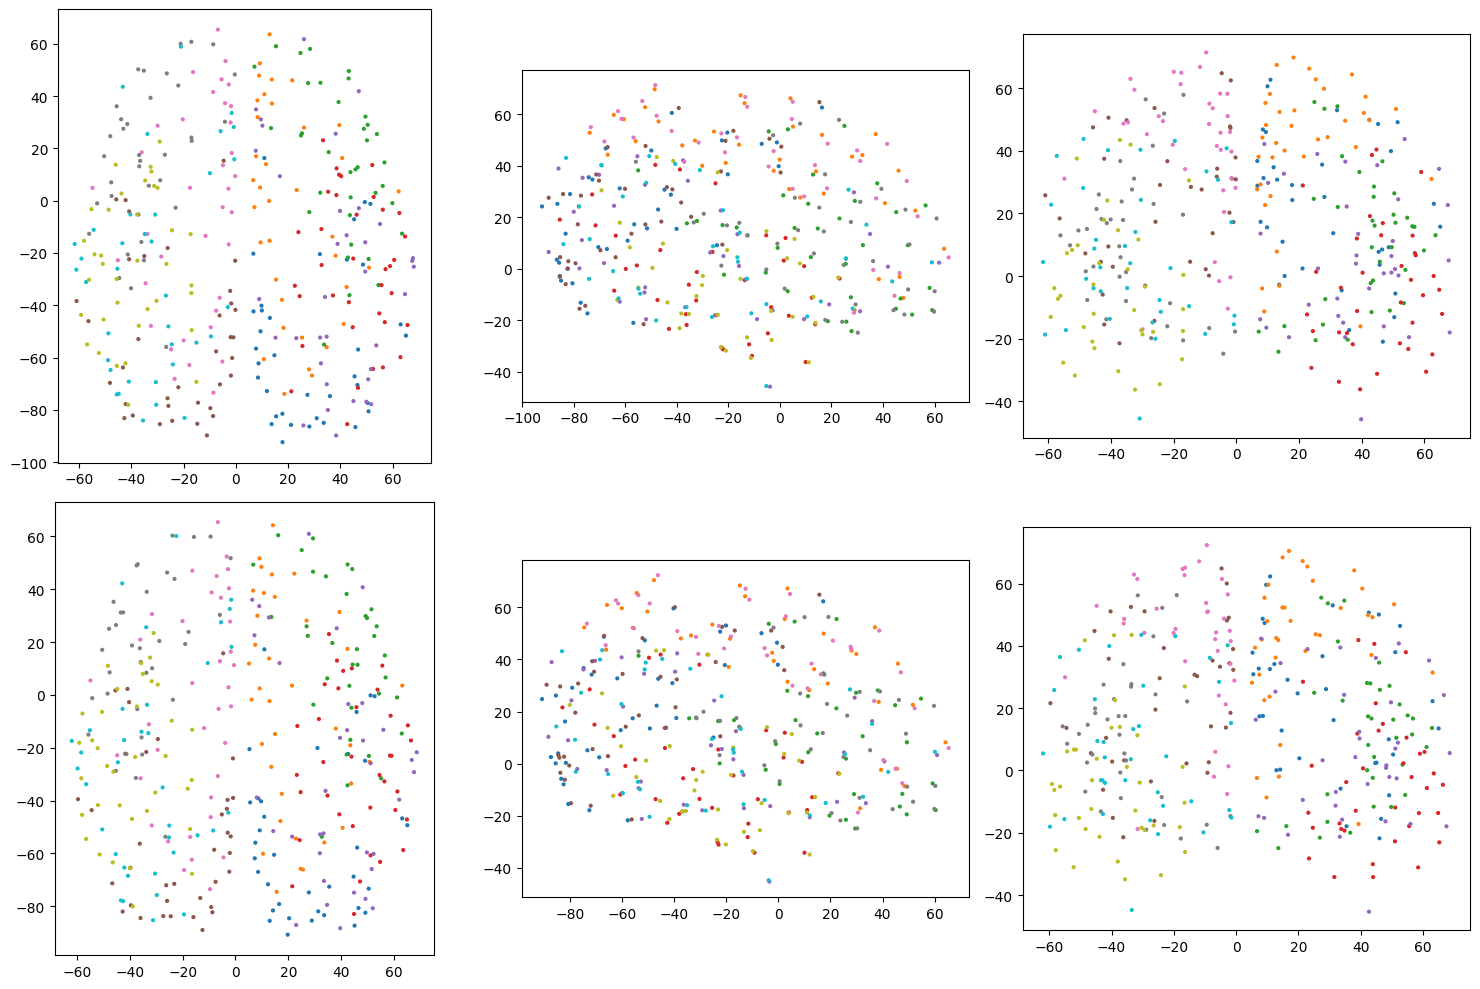

In [20]:
kwds = dict(s=4, c=np.arange(360), cmap='tab10')
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(15,10))

plot_points(axs[0,:],gl_centroids, **kwds)
plot_points(axs[1,:],centroids, **kwds)

for ax in axs.flatten():
    ax.set(aspect='equal')

fig.tight_layout()

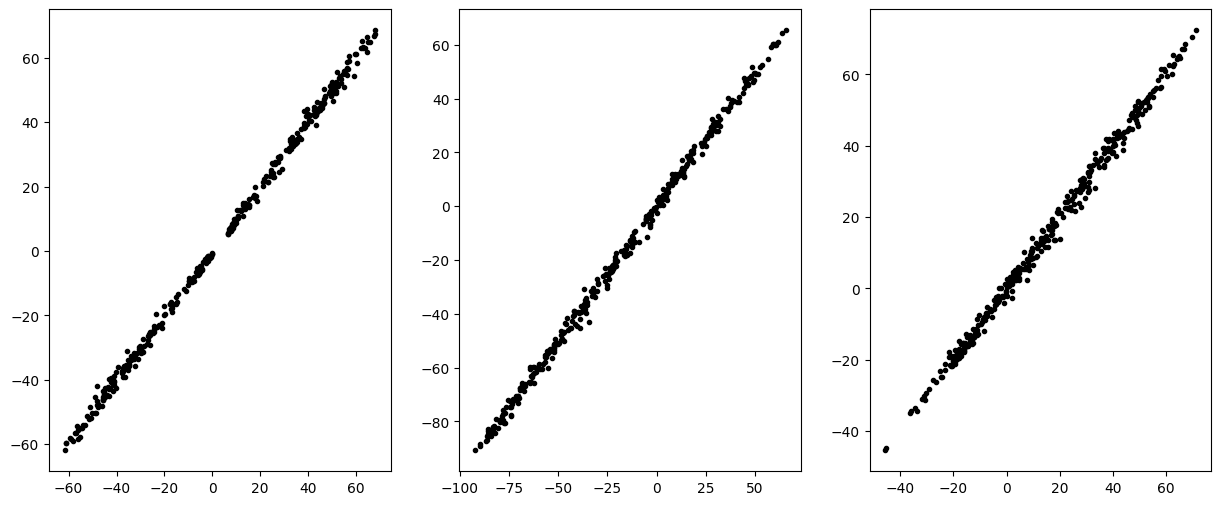

In [21]:
fig, axs = plt.subplots(ncols=3)
axs[0].plot(gl_centroids[:,0], centroids[:,0],'k.')
axs[1].plot(gl_centroids[:,1], centroids[:,1],'k.')
axs[2].plot(gl_centroids[:,2], centroids[:,2],'k.')

Looks close and in order. Let's verify that.

In [22]:
d = np.zeros((360, 360))
for i in range(360):
    d[i,:] = np.sum((gl_centroids[i,:] - centroids)**2, axis=1)

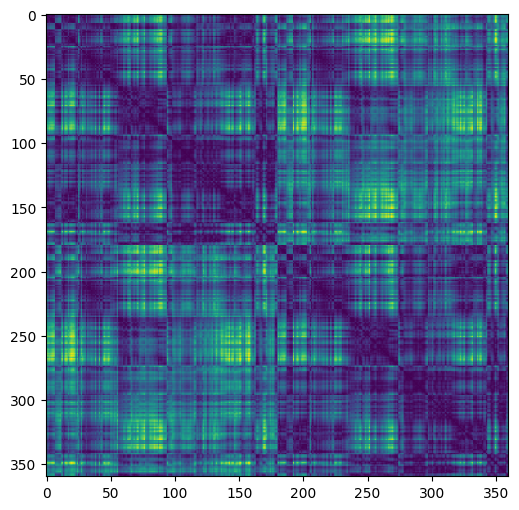

In [23]:
plt.imshow(d)

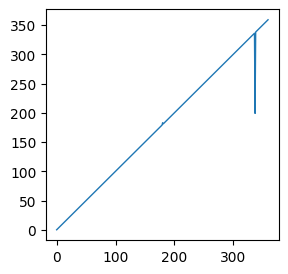

In [24]:
plt.figure(figsize=(3,3))
plt.plot(np.argmin(d,axis=1), lw=1)

In [25]:
np.argwhere(np.argmin(d,axis=1)-np.arange(360) != 0.).squeeze()

array([180, 337])

In [26]:
np.argmin(d[180,:]),np.argmin(d[337,:])

(183, 199)

Ok, so the closest points are on the diagonal (in order), except the two rows. Let's verify this an leftover from the nonlinear transform we didn't do.

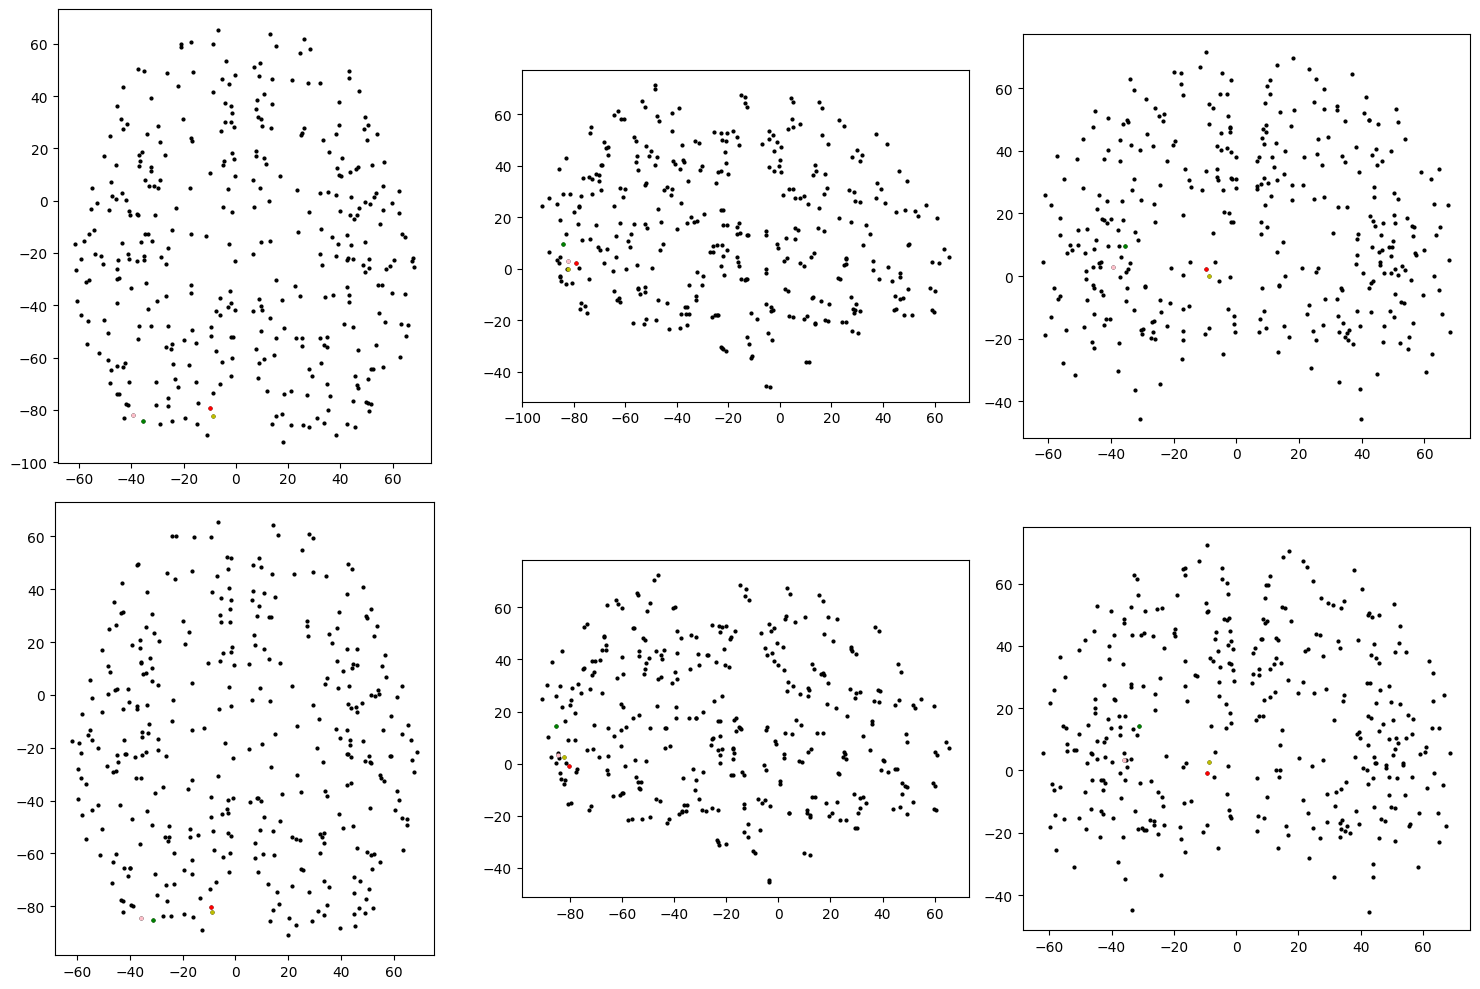

In [27]:
kwds = dict(s=4, c='k')#np.arange(360), cmap='tab10')
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(15,10))

def plot_points(axs, cs, **kwds):
    axs[0].scatter(cs[:,0], cs[:,1], **kwds)
    axs[1].scatter(cs[:,1], cs[:,2], **kwds)
    axs[2].scatter(cs[:,0], cs[:,2], **kwds)

plot_points(axs[0,:],gl_centroids, **kwds)
plot_points(axs[1,:],centroids, **kwds)

plot_points(axs[0,:],gl_centroids[[180],:], s=4, c='y')
plot_points(axs[0,:],gl_centroids[[183],:], s=4, c='r')

plot_points(axs[1,:],centroids[[180],:], s=4, c='y')
plot_points(axs[1,:],centroids[[183],:], s=4, c='r')



plot_points(axs[0,:],gl_centroids[[337],:], s=4, c='g')
plot_points(axs[0,:],gl_centroids[[199],:], s=4, c='pink')

plot_points(axs[1,:],centroids[[337],:], s=4, c='g')
plot_points(axs[1,:],centroids[[199],:], s=4, c='pink')
for ax in axs.flatten():
    ax.set(aspect='equal')

fig.tight_layout()

Yup, just a coincidence, looks topologically equivalent.

## volumetric check

Let's check the permuted indices 41-44 for the peace of mind also in the volumes. Here we use for comparison the volume from https://doi.org/10.6084/m9.figshare.3501911.v5 

In [28]:
nii_np = nb.load(data.path('external/neuroparc/Glasser_space-MNI152NLin6_res-1x1x1.nii.gz'))
nii_horn = nb.load(data.path('external/glasser_parcellation_mapping/horn_figshare/HCPMMP1_on_MNI152_ICBM2009a_nlin_hd.nii.gz'))

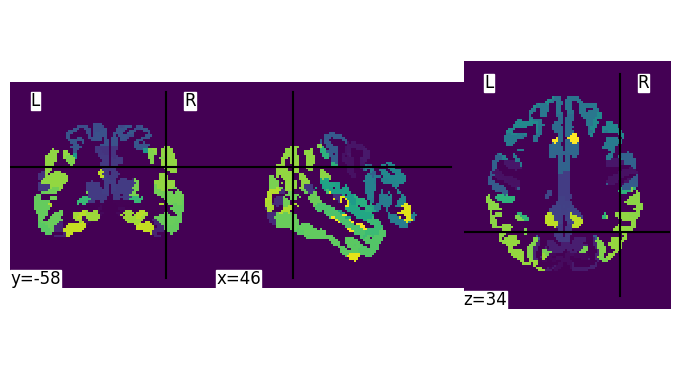

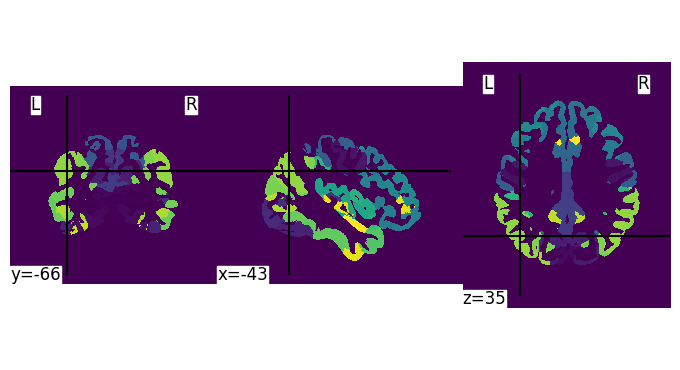

In [29]:
plotting.plot_img(nii_np)
plotting.plot_img(nii_horn)

In [30]:
vol_horn = np.round(nii_horn.get_fdata())
vol_horn[:195, :, : ] = 0

centroids_horn = []
for i in range(1, 181):
    idx = np.where(vol_horn==i)
    ijk = np.vstack(idx).T 
    xyz = nb.affines.apply_affine(nii_horn.affine, ijk)  # get mm coords
    
    centroids_horn.append(xyz.mean(axis=0))

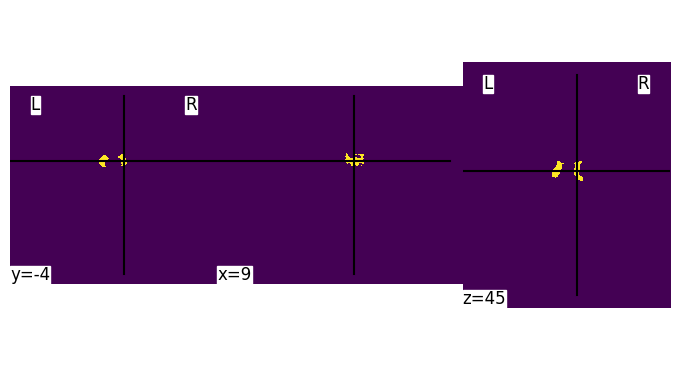

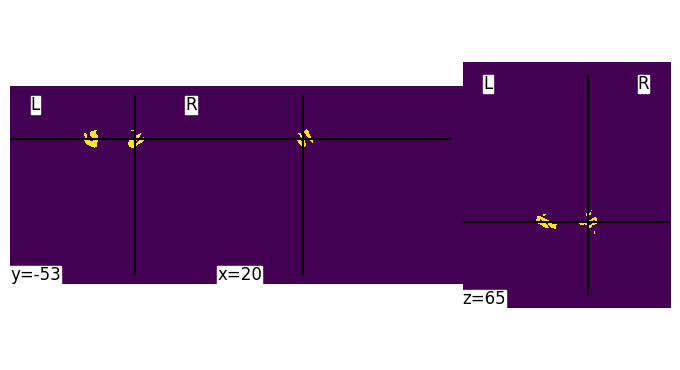

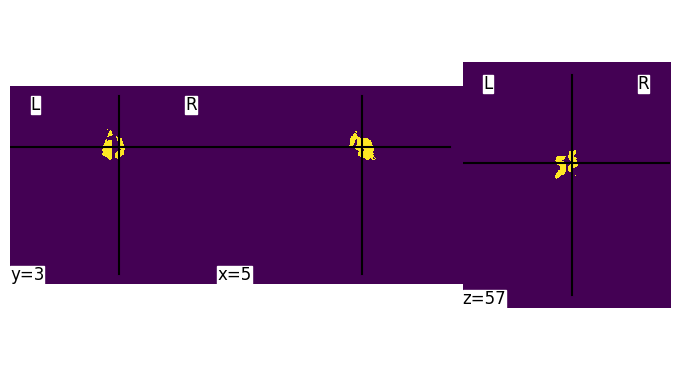

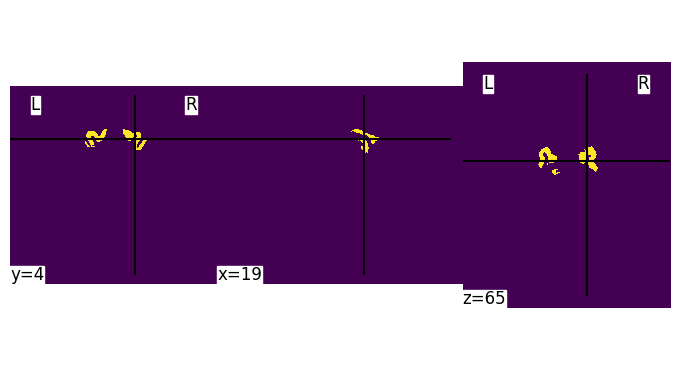

In [31]:
for i in [40, 41, 42, 43]:
    plotting.plot_img(nb.Nifti1Image(np.isclose(nii_horn.get_fdata(),i+1).astype(float), nii_horn.affine), cut_coords=centroids_horn[i])

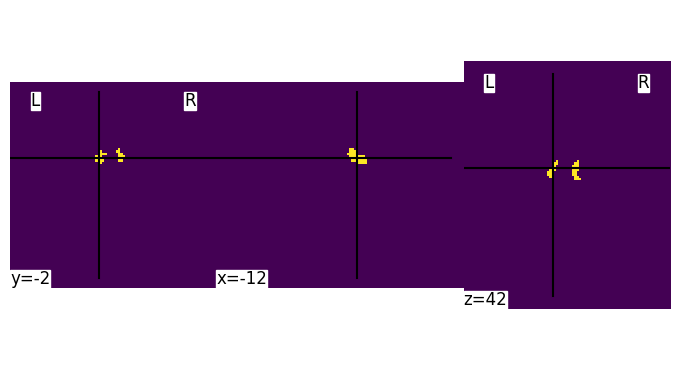

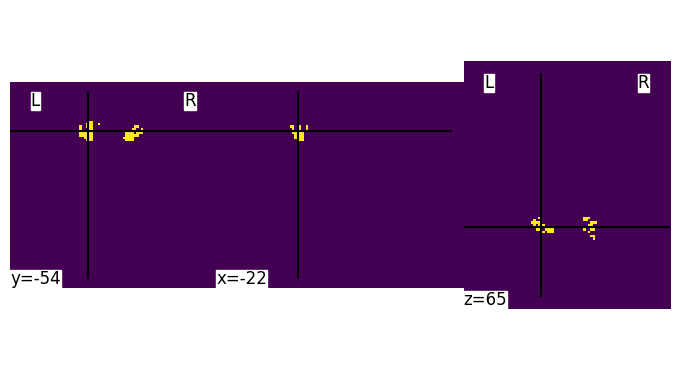

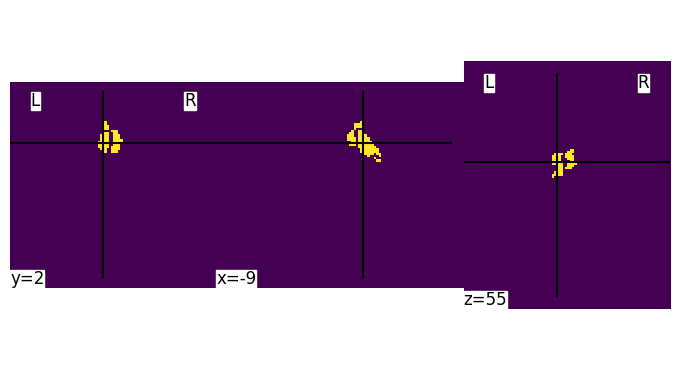

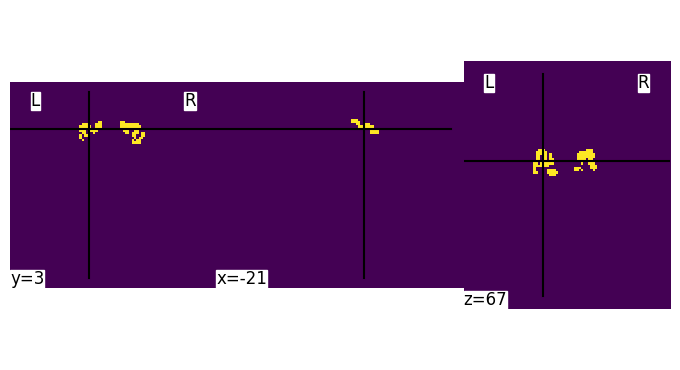

In [32]:
for i in [40, 41, 42, 43]:
    plotting.plot_img(nb.Nifti1Image(np.isclose(nii_np.get_fdata(),i+1).astype(float), nii_np.affine), cut_coords=(centroids*np.array([-1,1,1]))[i])

Ok, so these are in order. Hence we can take the label mapping as is (ignore neuroparc), and map it to the 